In [1]:
# Input libraries

import pandas as pd
import numpy as np

# Input source data
EVC_workplace = pd.read_csv("./source_data/jp1(2019_01_01 to 2019_12_31)_15min_paper3.csv",index_col = 0)

# Sample charging piles based on IDs

In [2]:
# Get the charging piles' ID from the annual EV charging session dataset
stationID_workplace = EVC_workplace.stationID.unique()
num_station_workplace = len(stationID_workplace)

# Uniform sampling
np.random.seed(30)
stationID_workplace_10 = np.random.choice(stationID_workplace, size=10, replace=False)
stationID_workplace_50 = np.random.choice(stationID_workplace, size=50, replace=False)
stationID_workplace_90 = np.random.choice(stationID_workplace, size=90, replace=True)
stationID_workplace_130 = np.random.choice(stationID_workplace, size=130, replace=True)
stationID_workplace_170 = np.random.choice(stationID_workplace, size=170, replace=True)
stationID_workplace_210 = np.random.choice(stationID_workplace, size=210, replace=True)
stationID_workplace_250 = np.random.choice(stationID_workplace, size=250, replace=True)
stationID_workplace_290 = np.random.choice(stationID_workplace, size=290, replace=True)
stationID_workplace_330 = np.random.choice(stationID_workplace, size=330, replace=True)
stationID_workplace_370 = np.random.choice(stationID_workplace, size=370, replace=True)
stationID_workplace_410 = np.random.choice(stationID_workplace, size=410, replace=True)
stationID_workplace_450 = np.random.choice(stationID_workplace, size=450, replace=True)

# Sample EV charging sessions according to the sampled charging piles

In [5]:
# the function to sample EV charging sessions based on the sampled charging piles
def sample_EVC(EVC,stationID):
    """
    EVC: the original EV charging dataset, df
    stationID: the name of the charging station to be select, np.array
    """
    # create a Df to store the output EV charging data
    EVC_output = pd.DataFrame()
    # to store the stationID that was already selected
    stationID_selected = [] 
    for i in stationID:
        EVC_new = EVC.query("stationID == @i").copy()
        # If the stationID is being selected more than one time, a random value would be added to the charging start time and end time
        if i in stationID_selected:
            for m in EVC_new.index:
                a = EVC_new.loc[m,'connectionTime_index']
                b = EVC_new.loc[m,'disconnectTime_index']
                c = EVC_new.loc[m,'doneChargingTime_index']
                timeslot_changed_lb = int(max(-a,-b,-c,-3))
                timeslot_changed_ub = int(min(191-a,191-b,191-c,4))
                timeslot_changed = np.random.choice(range(timeslot_changed_lb,timeslot_changed_ub,1)) # 偏差-45~45分钟
                EVC_new.loc[m,'connectionTime_index'] = a + timeslot_changed
                EVC_new.loc[m,'disconnectTime_index'] = b + timeslot_changed
                EVC_new.loc[m,'doneChargingTime_index'] = c + timeslot_changed
            EVC_output = pd.concat([EVC_output,EVC_new],axis=0)
        # If the stationID is being selected only one time, directly add the selected data to the EVC_output
        else:
            EVC_output = pd.concat([EVC_output,EVC_new],axis=0)
        stationID_selected.append(i)
    
    # reset the index after finishing the adding
    EVC_output = EVC_output.reset_index(drop=True)
    
    return EVC_output

In [4]:
# Conduct sampling
EVC_workplace_10 = sample_EVC(EVC=EVC_workplace,stationID=stationID_workplace_10)
EVC_workplace_50 = sample_EVC(EVC=EVC_workplace,stationID=stationID_workplace_50)
EVC_workplace_90 = sample_EVC(EVC=EVC_workplace,stationID=stationID_workplace_90)
EVC_workplace_130 = sample_EVC(EVC=EVC_workplace,stationID=stationID_workplace_130)
EVC_workplace_170 = sample_EVC(EVC=EVC_workplace,stationID=stationID_workplace_170)
EVC_workplace_210 = sample_EVC(EVC=EVC_workplace,stationID=stationID_workplace_210)
EVC_workplace_250 = sample_EVC(EVC=EVC_workplace,stationID=stationID_workplace_250)
EVC_workplace_290 = sample_EVC(EVC=EVC_workplace,stationID=stationID_workplace_290)
EVC_workplace_330 = sample_EVC(EVC=EVC_workplace,stationID=stationID_workplace_330)
EVC_workplace_370 = sample_EVC(EVC=EVC_workplace,stationID=stationID_workplace_370)
EVC_workplace_410 = sample_EVC(EVC=EVC_workplace,stationID=stationID_workplace_410)
EVC_workplace_450 = sample_EVC(EVC=EVC_workplace,stationID=stationID_workplace_450)

# Output the result

In [5]:
EVC_workplace_10.to_csv("./result/EVC/EVC_workplace_10.csv")
EVC_workplace_50.to_csv("./result/EVC/EVC_workplace_50.csv")
EVC_workplace_90.to_csv("./result/EVC/EVC_workplace_90.csv")
EVC_workplace_130.to_csv("./result/EVC/EVC_workplace_130.csv")
EVC_workplace_170.to_csv("./result/EVC/EVC_workplace_170.csv")
EVC_workplace_210.to_csv("./result/EVC/EVC_workplace_210.csv")
EVC_workplace_250.to_csv("./result/EVC/EVC_workplace_250.csv")
EVC_workplace_290.to_csv("./result/EVC/EVC_workplace_290.csv")
EVC_workplace_330.to_csv("./result/EVC/EVC_workplace_330.csv")
EVC_workplace_370.to_csv("./result/EVC/EVC_workplace_370.csv")
EVC_workplace_410.to_csv("./result/EVC/EVC_workplace_410.csv")
EVC_workplace_450.to_csv("./result/EVC/EVC_workplace_450.csv")

# Data distribution of the EV charging session dataset for validating the sampling method

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
# Set up empty Df to store raw data
EVC_workplace_arrival = pd.DataFrame(columns = range(10,490,40))
EVC_workplace_departure = pd.DataFrame(columns = range(10,490,40))
EVC_workplace_energy = pd.DataFrame(columns = range(10,490,40))

In [15]:
# Read the data and store them in the developed Df
for i in range(450,-30,-40):
    EVC_workplace_arrival[i] = pd.read_csv(f"result/EVC/EVC_workplace_{i}.csv",index_col = 0)['connectionTime_index']
    EVC_workplace_departure[i] = pd.read_csv(f"result/EVC/EVC_workplace_{i}.csv",index_col = 0)['disconnectTime_index']
    EVC_workplace_energy[i] = pd.read_csv(f"result/EVC/EVC_workplace_{i}.csv",index_col = 0)['kWhDelivered']

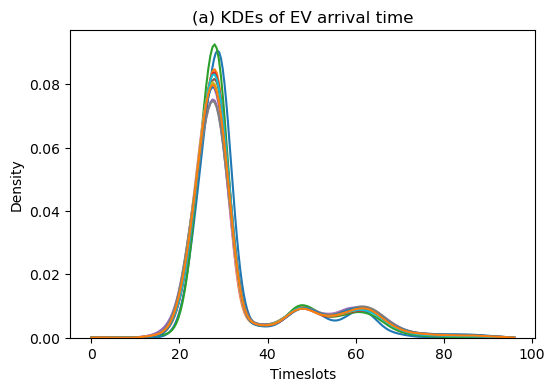

In [36]:
# EV arrival time

plt.figure(figsize=(6, 4))  # Set the figure size as needed
kde_range_arr = (0,96)

for col in EVC_workplace_arrival.columns:
    sns.kdeplot(EVC_workplace_arrival[col], fill=False, 
                label=col, clip=kde_range_arr)

plt.xlabel("Timeslots")
plt.title('(a) KDEs of EV arrival time')
plt.savefig("./result/Figure/KDEs of EV arrival time.svg",bbox_inches='tight')

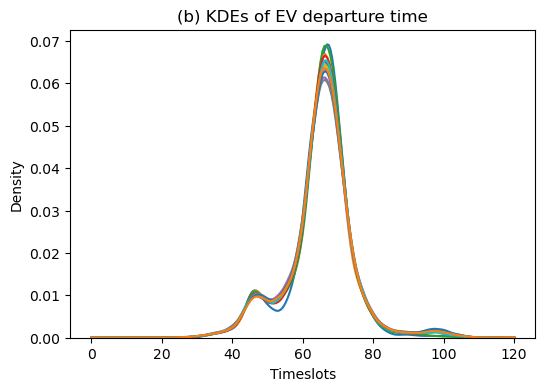

In [37]:
# EV departure time

plt.figure(figsize=(6, 4))  # Set the figure size as needed
kde_range_dep = (0,120)

for col in EVC_workplace_departure.columns:
    sns.kdeplot(EVC_workplace_departure[col], fill=False, 
                label=col, clip=kde_range_dep)

plt.xlabel("Timeslots")
plt.title('(b) KDEs of EV departure time')
plt.savefig("./result/Figure/KDEs of EV departure time.svg",bbox_inches='tight')

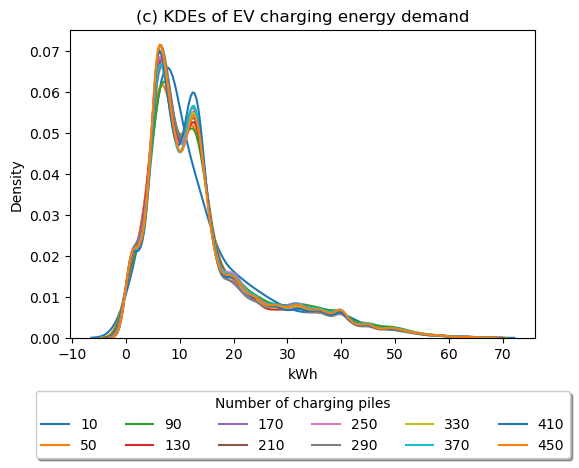

In [38]:
# EV energy demand

plt.figure(figsize=(6, 4))  # Set the figure size as needed

for col in EVC_workplace_energy.columns:
    sns.kdeplot(EVC_workplace_energy[col], fill=False, label=col)

plt.xlabel("kWh")
plt.legend(title='Number of charging piles', loc='upper center', 
           bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=6)
plt.title('(c) KDEs of EV charging energy demand')
plt.savefig("./result/Figure/KDEs of EV energy demand.svg",bbox_inches='tight')